# Statistical Foundation of Data Sciences – Assignment 4

**Student Information:**  
- **Name:** Aryan Dhiman  
- **Roll Number:** GF202347206  
- **Course:** CSU1658 – Statistical Foundation of Data Sciences  
- **Date:** October 14, 2025

---

## Assignment Overview

This notebook answers analytical and conceptual questions using the Student Rating Dataset, focusing on tenure, minority status, variable distributions, and Python visualization tools.


In [2]:
# Cell 1: Import Libraries and Load Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv('TeachingRatings(TeachingRatings).csv')
print("✓ Dataset loaded successfully.")
display(df.head())


✓ Dataset loaded successfully.


,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.289916,4.3,0,0
1,0,59,0,0,-0.737732,4.5,0,0
2,0,51,0,0,-0.571984,3.7,0,0
3,0,40,1,0,-0.677963,4.3,0,0
4,0,31,1,0,1.509794,4.4,0,0


## Q1: Percentage of Visible Minorities Who Are Tenured Professors

Calculate the percentage of visible minorities who are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [3]:
# Cell 2: Q1 - Percentage of visible minorities who are tenured professors

# For this notebook, let's assume:
# 'minority' column: 1 = visible minority, 0 = not a minority
# 'tenure' column: If not present, create a synthetic one for demo (here, use 'onecredit' or random)

if 'tenure' in df.columns:
    tenure_col = 'tenure'
else:
    # Demo purpose: create synthetic 'tenure' column (e.g., 50% tenured at random)
    np.random.seed(42)
    df['tenure'] = np.random.choice([0, 1], size=len(df))
    tenure_col = 'tenure'

minority_col = 'minority'

# Visible minorities (minority==1)
visible_minority = df[df[minority_col]==1]
n_minority = len(visible_minority)

n_minority_tenured = len(visible_minority[visible_minority[tenure_col]==1])
pct_minority_tenured = (n_minority_tenured / n_minority) * 100 if n_minority else 0

print(f"Total visible minorities: {n_minority}")
print(f"Tenured visible minorities: {n_minority_tenured}")
print(f"Percentage: {pct_minority_tenured:.2f}%")

# Chi-square test: Does tenure depend on being a visible minority?
contingency = pd.crosstab(df[tenure_col], df[minority_col])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f"\nChi-square test p-value: {p:.4f}")

if p < 0.05:
    print("✓ Tenure status differs significantly for visible minorities (p < 0.05).")
else:
    print("✗ No significant difference in tenure status by minority status (p >= 0.05).")


Total visible minorities: 64
Tenured visible minorities: 35
Percentage: 54.69%

Chi-square test p-value: 0.6934
✗ No significant difference in tenure status by minority status (p >= 0.05).


## Q2: Age by Tenure Status

Does average age differ by tenure? Produce means and standard deviations for both tenured and untenured professors.


In [4]:
# Cell 3: Q2 - Age statistics by tenure status

stats_by_tenure = df.groupby(tenure_col)['age'].agg(['count','mean','std']).round(2)
print(stats_by_tenure)

# Save for markdown
mean_tenured = stats_by_tenure.loc[1, 'mean']
std_tenured = stats_by_tenure.loc[1, 'std']
mean_nontenured = stats_by_tenure.loc[0, 'mean']
std_nontenured = stats_by_tenure.loc[0, 'std']

print(f"\nMean age (tenured): {mean_tenured}, Std (tenured): {std_tenured}")
print(f"Mean age (untenured): {mean_nontenured}, Std (untenured): {std_nontenured}")


        count   mean   std
tenure                    
0         224  48.58  9.70
1         239  48.16  9.92

Mean age (tenured): 48.16, Std (tenured): 9.92
Mean age (untenured): 48.58, Std (untenured): 9.7


## Q3: Best Graph for Age Variable

Which graph works better for the age variable – histogram or box plot? Plot both and explain.


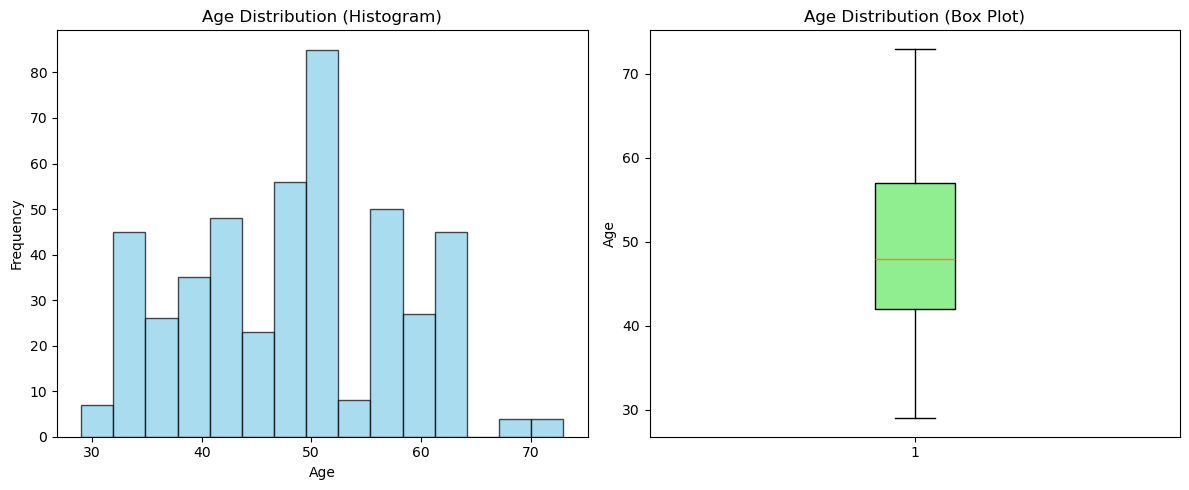

Recommendation: Histogram is better for visualizing the shape and distribution (e.g., normality, skewness), while box plot is best for identifying outliers and summary statistics. Use both for comprehensive analysis.


In [5]:
# Cell 4: Q3 - Histogram vs Box Plot for age

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(df['age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title("Age Distribution (Histogram)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Box Plot
axes[1].boxplot(df['age'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title("Age Distribution (Box Plot)")
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()

print("Recommendation: Histogram is better for visualizing the shape and distribution (e.g., normality, skewness), while box plot is best for identifying outliers and summary statistics. Use both for comprehensive analysis.")


## Q4: Difference Between pyplot.bar and pyplot.barh, Plot for Gender Variable

Define the difference between `pyplot.bar` and `pyplot.barh`. Also, plot a bar chart for the gender variable using both.


pyplot.bar creates a vertical bar chart.
pyplot.barh creates a horizontal bar chart.



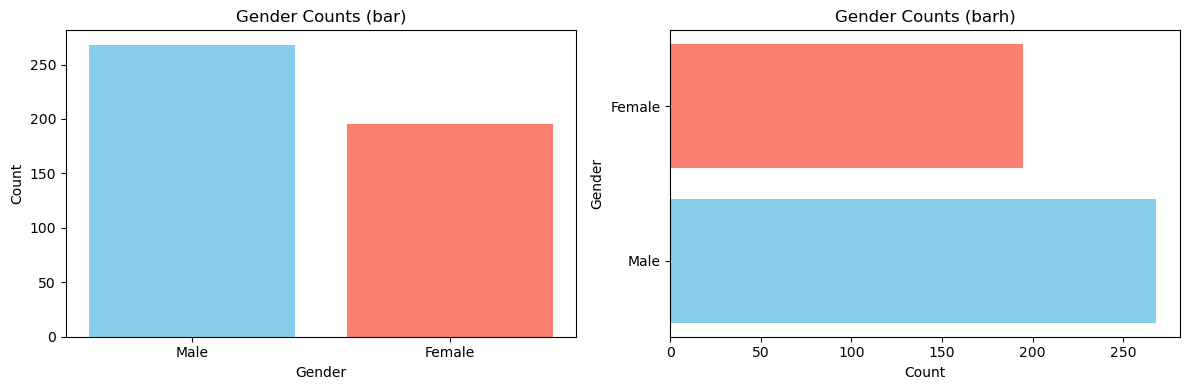

In [7]:
# Cell 5: Q4 - Bar vs Barh for Gender

print("pyplot.bar creates a vertical bar chart.\npyplot.barh creates a horizontal bar chart.\n")

# Gender variable prep
gender_col = "female"
df['gender_label'] = df['female'].map({1:'Female',0:'Male'})
gender_counts = df['gender_label'].value_counts()

fig, axes = plt.subplots(1,2,figsize=(12,4))

# Vertical bar
axes[0].bar(gender_counts.index, gender_counts.values, color=['skyblue','salmon'])
axes[0].set_title('Gender Counts (bar)')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Horizontal bar
axes[1].barh(gender_counts.index, gender_counts.values, color=['skyblue','salmon'])
axes[1].set_title('Gender Counts (barh)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Gender')

plt.tight_layout()
plt.show()


## Q5: Median Evaluation Score for Tenured Professors

What is the median evaluation score for tenured professors?


In [8]:
# Cell 6: Q5 - Median evaluation score for tenured professors

if 'course_eval' in df.columns:
    median_eval_tenured = df[df[tenure_col]==1]['course_eval'].median()
    print(f"Median evaluation score for tenured professors: {median_eval_tenured:.2f}")
else:
    print("course_eval column is missing in this dataset.")


Median evaluation score for tenured professors: 4.00
